In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the dataset
wine_data = pd.read_csv("C:/Users/bhara/OneDrive/Documents/pranay/WineQT.csv")

# Display the first few rows of the dataset
print(wine_data.head())

# Check for missing values
print(wine_data.isnull().sum())

# Summary statistics
print(wine_data.describe())



   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

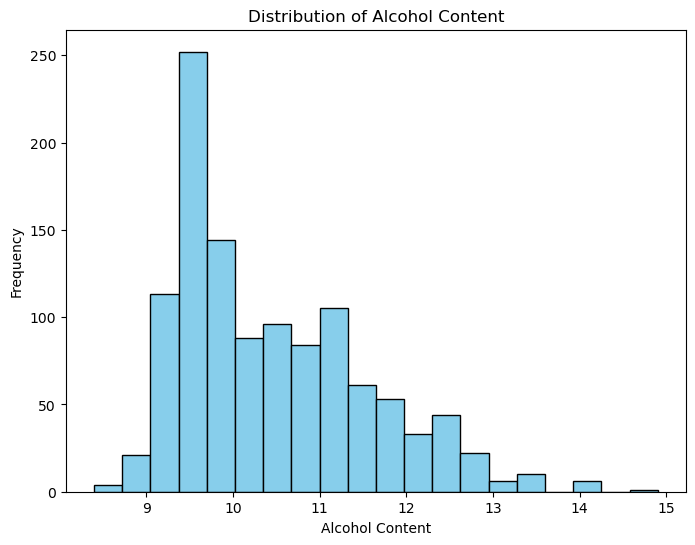

In [43]:
def plot_alcohol_histogram(data, bins=20):
    """
    Plots a histogram of alcohol content from the given dataset.

    Parameters:
        data (pandas.DataFrame): The dataset containing alcohol content.
        bins (int): Number of bins for the histogram. Default is 20.

    Returns:
        None
    """
# Histogram of alcohol content
plt.figure(figsize=(8, 6))
plt.hist(wine_data['alcohol'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.show()


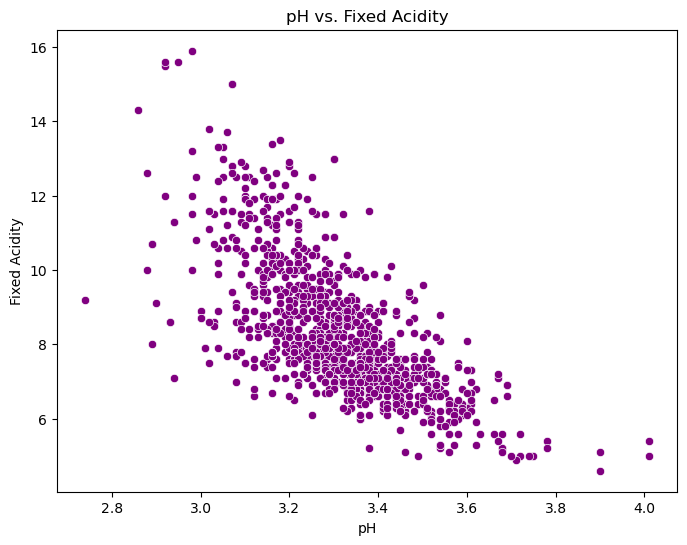

In [44]:
def plot_pH_fixed_acidity_scatter(data):
    """
    Plots a scatter plot of pH vs. fixed acidity from the given dataset.

    Parameters:
        data (pandas.DataFrame): The dataset containing pH and fixed acidity.

    Returns:
        None
    """
# Scatter plot of pH vs. fixed acidity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pH', y='fixed acidity', data=wine_data, color='purple')
plt.title('pH vs. Fixed Acidity')
plt.xlabel('pH')
plt.ylabel('Fixed Acidity')
plt.show()


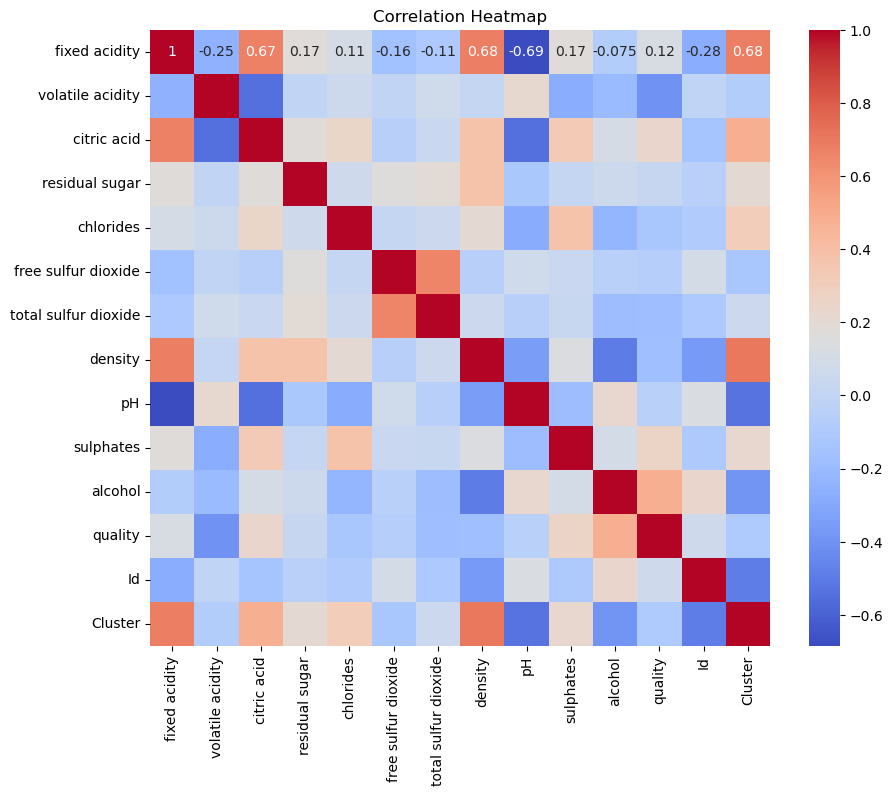

In [45]:
def plot_correlation_heatmap(data):
    """
    Plots a heatmap of the correlation matrix for the given dataset.

    Parameters:
        data (pandas.DataFrame): The dataset for which correlation matrix heatmap is to be plotted.

    Returns:
        None
    """
# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(wine_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


C:\Users\bhara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bhara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


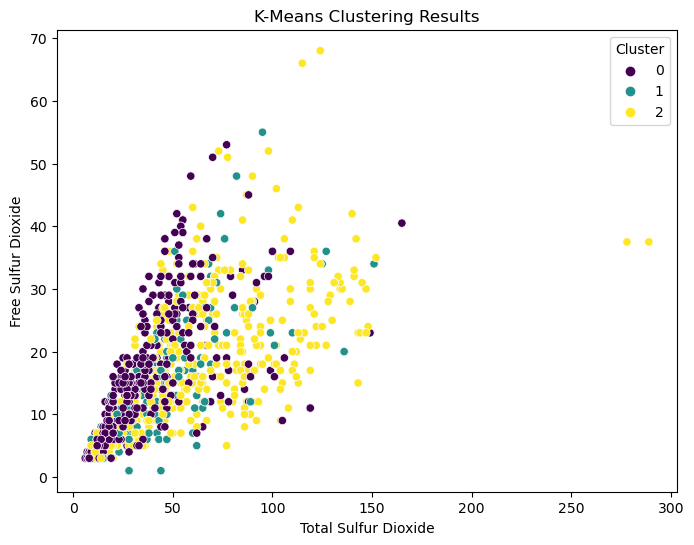

In [46]:
def preprocess_data(data):
    """
    Preprocesses the data by separating features from the target variable and standardizing features.

    Parameters:
        data (pandas.DataFrame): The dataset containing features and the target variable.

    Returns:
        tuple: A tuple containing standardized features (X_scaled) and the target variable (y).
    """
 # Separate features from the target variable (assuming 'quality' is the target)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']


def perform_kmeans_clustering(X_scaled, n_clusters=3, random_state=42):
    """
    Performs K-means clustering on the standardized features.

    Parameters:
        X_scaled (numpy.ndarray): Standardized features.
        n_clusters (int): The number of clusters to form. Default is 3.
        random_state (int): Determines random number generation for centroid initialization. Default is 42.

    Returns:
        sklearn.cluster.KMeans: Fitted KMeans object.
    """

# Data preprocessing: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def add_cluster_labels(data, kmeans):
    """
    Adds cluster labels to the dataset based on the fitted KMeans object.

    Parameters:
        data (pandas.DataFrame): The dataset to which cluster labels are to be added.
        kmeans (sklearn.cluster.KMeans): Fitted KMeans object.

    Returns:
        pandas.DataFrame: The dataset with cluster labels added.
    """
# Perform k-means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=42)
kmeans.fit(X_scaled)

def plot_kmeans_clustering_results(data, x_feature, y_feature):
    """
    Plots the K-means clustering results using a scatter plot.

    Parameters:
        data (pandas.DataFrame): The dataset containing cluster labels and features.
        x_feature (str): The feature to be plotted on the x-axis.
        y_feature (str): The feature to be plotted on the y-axis.

    Returns:
        None
    """
# Add cluster labels to the dataset
wine_data['Cluster'] = kmeans.labels_

def plot_kmeans_clustering_results(data, x_feature, y_feature):
    """
    Plots the K-means clustering results using a scatter plot.

    Parameters:
        data (pandas.DataFrame): The dataset containing cluster labels and features.
        x_feature (str): The feature to be plotted on the x-axis.
        y_feature (str): The feature to be plotted on the y-axis.

    Returns:
        None
    """
# Now create the scatter plot with the 'Cluster' hue
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total sulfur dioxide', y='free sulfur dioxide', hue='Cluster', data=wine_data, palette='viridis')
plt.title('K-Means Clustering Results')
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Free Sulfur Dioxide')
plt.show()

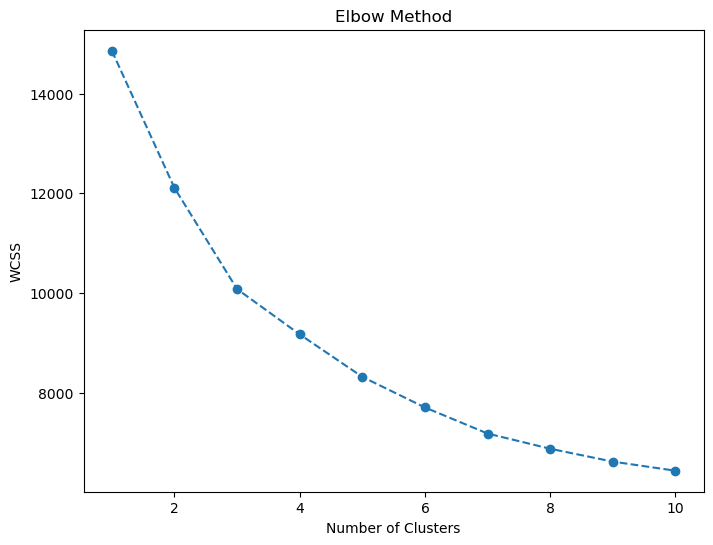

In [47]:
def plot_elbow_method(wcss, max_clusters=10):
    """
    Plots the elbow plot for determining the optimal number of clusters.

    Parameters:
        wcss (list): A list containing the WCSS values for different numbers of clusters.
        max_clusters (int): The maximum number of clusters considered. Default is 10.

    Returns:
        None
    """
# Elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


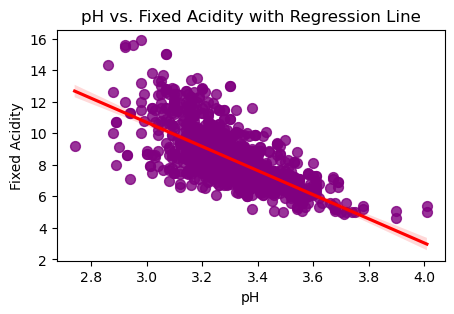

In [48]:
def plot_regression_pH_fixed_acidity(data):
    """
    Plots a scatter plot of pH vs. fixed acidity with a regression line.

    Parameters:
        data (pandas.DataFrame): The dataset containing 'pH' and 'fixed acidity'.

    Returns:
        None
    """
plt.figure(figsize=(5, 3))
sns.regplot(x='pH', y='fixed acidity', data=wine_data, color='purple', scatter_kws={'s': 50}, line_kws={"color": "red"})
plt.title('pH vs. Fixed Acidity with Regression Line')
plt.xlabel('pH')
plt.ylabel('Fixed Acidity')
plt.show()
